In [ ]:
# %pip install -U matplotlib
# %pip install SimpleITK
# %pip install ipywidgets
# %pip install opencv-python
# %pip install antspyx
# %pip install tf-keras
# %pip install --upgrade tensorflow-probability
# %pip install antspynet
# %pip install templateflow
# %pip install seaborn

In [1]:
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
#https://ida.loni.usc.edu/pages/access/studyData.jsp?categoryId=2&subCategoryId=55
df = pd.read_csv('Participant_Status_22Mar2024.csv')
# df.head()

In [116]:
filtered_df = df[((df["ENROLL_STATUS"] == "Complete") | (df["ENROLL_STATUS"] == "Withdrew"))
                 ].drop_duplicates(subset=['COHORT']).sort_values(by=['PATNO'])
filtered_df[["PATNO", "COHORT", "COHORT_DEFINITION", "ENROLL_STATUS"]]

,PATNO,COHORT,COHORT_DEFINITION,ENROLL_STATUS
6,3006,1,Parkinson's Disease,Withdrew
11,3011,2,Healthy Control,Withdrew
22,3022,3,SWEDD,Withdrew
839,10874,4,Prodromal,Withdrew


In [ ]:
# df = df[condition]
df["COHORT"].value_counts()

In [ ]:
df["ENROLL_STATUS"].value_counts()

In [ ]:
condition = df["ENROLL_STATUS"].isin(["Complete", "Withdrew", "Enrolled", "Baseline"])
df[condition]["COHORT"].value_counts()
#her

In [ ]:
condition = df["ENROLL_STATUS"].isin(["Enrolled"])
df[condition]["COHORT"].value_counts()

In [ ]:
condition = df["ENROLL_STATUS"].isin(["Complete", "Withdrew"])
df[condition]["COHORT"].value_counts()

In [ ]:
condition = df["ENROLL_STATUS"].isin(["Complete", "Withdrew", "Baseline"])
df[condition]["COHORT"].value_counts()

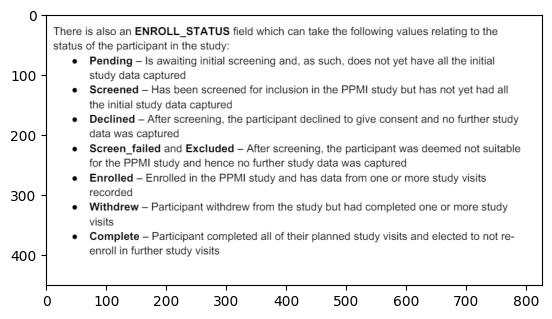

In [23]:
img = np.asarray(Image.open('status.png'))
plt.imshow(img)

In [ ]:
df.columns

In [ ]:
df["ENROLL_STATUS"].value_counts()

In [94]:
unique = df["COHORT"].unique()

filtered_df = df[((df["ENROLL_STATUS"] == "Complete") | (df["ENROLL_STATUS"] == "Withdrew"))]
filtered_df["COHORT"].value_counts()

COHORT
1    275
4     96
2     86
3     62
Name: count, dtype: int64

In [93]:
condition = df["ENROLL_STATUS"].isin(["Complete", "Withdrew"])
sample_1 = df[(df["COHORT"] == 1) & condition]
sample_2 = df[(df["COHORT"] == 2) & condition]
sample_3 = df[(df["COHORT"] == 3) & condition]
sample_4 = df[(df["COHORT"] == 4) & condition]

df2 = pd.concat([sample_1, sample_2, sample_3, sample_4])
df2["COHORT"].value_counts()

COHORT
1    275
4     96
2     86
3     62
Name: count, dtype: int64

In [ ]:
img = np.asarray(Image.open('cohort.png'))
plt.imshow(img)

In [ ]:
#89 at least 2 visits
#204 any date
import os
import shutil

coherts = {}
df4 = df[df["ENROLL_STATUS"].isin(["Complete", "Withdrew"])]
total = 0
total_to_remove = 0
for p in os.listdir('PPMI'):
    try:
        patno = int(p)
    except ValueError:
        print("error", p) 
        continue

    matching_rows = df4[df4["PATNO"] == patno]
    if not matching_rows.empty:
        total += 1
        coherts[patno] = matching_rows["COHORT"].values[0]
    else:
        path_to_remove = os.path.join("PPMI", str(patno))
        shutil.rmtree(path_to_remove)
        # print("removed", patno)
        total_to_remove +=1

# for c in range(1, 5):
#     print(f"COHORT {c}: {len([k for k, v in coherts.items() if v == c])}")

total

In [13]:
total_to_remove

0

In [ ]:
# export TEMPLATEFLOW_HOME="C:/Users/andre/parkinson/templates"

In [ ]:
import os
import SimpleITK as sitk
from antspynet.utilities import brain_extraction
from templateflow import api as tflow
import ants

template_1 = tflow.get('MNI152Lin', desc=None, resolution=1, suffix='T2w', extension='nii.gz')
template_2 = tflow.get('MNI152NLin2009cAsym', desc=None, resolution=1, suffix='T2w', extension='nii.gz')
# template_3 = tflow.get('MNI152NLin6Asym', desc=None, resolution=1, suffix='T2w', extension='nii.gz')
# template_4 = tflow.get('MNI152NLin6Sym', desc=None, resolution=1, suffix='T2w', extension='nii.gz')
template_5 = tflow.get('MNI152NLin2009cSym', desc=None, resolution=1, suffix='T2w', extension='nii.gz')
template_6 = tflow.get('PediatricAsym', desc=None, resolution=1, suffix='T2w', extension='nii.gz')
template_7 = tflow.get('Infant', desc=None, resolution=1, suffix='T2w', extension='nii.gz')


mni_template_path_1 = str(template_1)
mni_nifti_1 = ants.image_read(mni_template_path_1)
template_brain_1 = brain_extraction(mni_nifti_1, modality="t2", verbose=False)
template_brain_mask_1 = ants.get_mask(template_brain_1, low_thresh=0.5)
template_extracted_brain_1 = ants.mask_image(mni_nifti_1, template_brain_mask_1)


mni_template_path_2 = str(template_2)
mni_nifti_2 = ants.image_read(mni_template_path_2)
template_brain_2 = brain_extraction(mni_nifti_2, modality="t2", verbose=False)
template_brain_mask_2 = ants.get_mask(template_brain_2, low_thresh=0.5)
template_extracted_brain_2 = ants.mask_image(mni_nifti_2, template_brain_mask_2)


mni_template_path_5 = str(template_5)
mni_nifti_5 = ants.image_read(mni_template_path_5)
template_brain_5 = brain_extraction(mni_nifti_5, modality="t2", verbose=False)
template_brain_mask_5 = ants.get_mask(template_brain_5, low_thresh=0.5)
template_extracted_brain_5 = ants.mask_image(mni_nifti_5, template_brain_mask_5)



def convert_dicom_to_nifti_and_extract_brain(dicom_directory, output_directory):
    os.makedirs(output_directory, exist_ok=True)
    

    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(dicom_directory)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    subject_path = os.path.join(output_directory, 'subject.nii.gz')
    sitk.WriteImage(image, subject_path, True)
    subject_nifti = ants.image_read(subject_path)
    


    prob_brain_mask = brain_extraction(subject_nifti, modality="t2")
    brain_mask = ants.get_mask(prob_brain_mask, low_thresh=0.5)
    extracted_brain = ants.mask_image(subject_nifti, brain_mask)
    output_path = os.path.join(output_directory, "extracted_brain.nii.gz")
    ants.image_write(extracted_brain, output_path)



    mytx = ants.registration(fixed=template_extracted_brain_2, 
                         moving=extracted_brain, 
                         type_of_transform = 'SyN' )
    
    warped_image = ants.apply_transforms(fixed=template_extracted_brain_2,
                                            moving=extracted_brain,
                                            transformlist=mytx['fwdtransforms'])
    ants.image_write(warped_image, os.path.join(output_directory, "warped_brain_2.nii.gz"))



    mytx = ants.registration(fixed=template_extracted_brain_5, 
                         moving=extracted_brain, 
                         type_of_transform = 'SyN' )
    
    warped_image = ants.apply_transforms(fixed=template_extracted_brain_5,
                                            moving=extracted_brain,
                                            transformlist=mytx['fwdtransforms'])
    ants.image_write(warped_image, os.path.join(output_directory, "warped_brain_5.nii.gz"))


In [6]:
dicom_root = 'PPMI'
nifti_root = 'NIfTI'
filter = df[((df["ENROLL_STATUS"] == "Complete") | (df["ENROLL_STATUS"] == "Withdrew"))]
for patno in os.listdir(dicom_root):
    try:
        patno_int = int(patno)
        
        matching_rows = filter[filter["PATNO"] == patno_int]
        if not matching_rows.empty:
            patno_path = os.path.join(dicom_root, patno)
            if os.path.isdir(patno_path):
                for dtype in os.listdir(patno_path):
                    type_path = os.path.join(patno_path, dtype)
                    if os.path.isdir(type_path):
                        for date in os.listdir(type_path):
                            date_path = os.path.join(type_path, date)
                            if os.path.isdir(date_path):
                                for ids in os.listdir(date_path):
                                    ids_path = os.path.join(date_path, ids)
                                    if os.path.isdir(ids_path):
                                        output_path = os.path.join(nifti_root, patno, dtype, date, ids)
                                        convert_dicom_to_nifti_and_extract_brain(ids_path, output_path)
        else:
            print(df["ENROLL_STATUS"])
            print(f"no matching rows for {patno}")
    except ValueError:
        print(f"PATNO directory: {patno}")

In [ ]:
import os
import shutil
import uuid

nifti_root = 'NIfTI'
data_root = 'DATA'

for patno in os.listdir(nifti_root):
    try:
        patno_int = int(patno)
        matching_rows = df[df["PATNO"] == patno_int]
        if not matching_rows.empty:
            cohort_value = str(matching_rows["COHORT"].values[0])
            cohort_path = os.path.join(data_root, cohort_value)
            os.makedirs(cohort_path, exist_ok=True)
            patno_path = os.path.join(nifti_root, patno)
            if os.path.isdir(patno_path):
                dtypes = os.listdir(patno_path)
                for dtype in dtypes:
                    type_path = os.path.join(patno_path, dtype)
                    if os.path.isdir(type_path):
                        for date in os.listdir(type_path):
                            date_path = os.path.join(type_path, date)
                            if os.path.isdir(date_path):
                                for ids in os.listdir(date_path):
                                    ids_path = os.path.join(date_path, ids)
                                    if os.path.isdir(ids_path):
                                        for i in range(1, 6):
                                            if i > 1:
                                                file_path = os.path.join(ids_path, f"warped_brain_{i}.nii.gz")
                                            else:
                                                file_path = os.path.join(ids_path, f"warped_brain.nii.gz")
                                            if os.path.isfile(file_path):
                                                unique_id_2 = uuid.uuid4().hex
                                                new_filename = f"{unique_id_2}.nii.gz"
                                                file_target_path = os.path.join(cohort_path, new_filename)
                                                shutil.copy(file_path, file_target_path)
                                                os.remove(file_path)
        else:
            print("No matching record for PATNO:", patno_int)
    except ValueError:
        print(f"PATNO directory: {patno}")


In [7]:
import os

data_root = 'DATA'

if os.path.exists(data_root):
    for folder in os.listdir(data_root):
        folder_path = os.path.join(data_root, folder)
        if os.path.isdir(folder_path):
            files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
            file_count = len(files)
            print(f"Folder: {folder}, Number of files: {file_count}")
else:
    print("The directory DATA does not exist.")

# Old
# Folder: 1, Number of files: 425
# Folder: 2, Number of files: 144
# Folder: 3, Number of files: 111
# Folder: 4, Number of files: 95

Folder: 1, Number of files: 0
Folder: 2, Number of files: 0
Folder: 3, Number of files: 0
Folder: 4, Number of files: 0


In [6]:
import os
import shutil

source_root = 'DATA'
target_root_1 = 'DATA_ORD_1'
target_root_2 = 'DATA_ORD_2'


os.makedirs(target_root_1, exist_ok=True)
os.makedirs(target_root_2, exist_ok=True)

if os.path.exists(source_root):
    for folder in os.listdir(source_root):
        folder_path = os.path.join(source_root, folder)
        if os.path.isdir(folder_path):
            files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
            files.sort()
            first_90_files = files[:180]
            remaining_files = files[180:]
            def copy_files(file_list, target_root):
                target_folder_path = os.path.join(target_root, folder)
                os.makedirs(target_folder_path, exist_ok=True)
                for file in file_list:
                    source_file_path = os.path.join(folder_path, file)
                    target_file_path = os.path.join(target_folder_path, file)
                    shutil.copy(source_file_path, target_file_path)
                    os.remove(source_file_path)
            copy_files(first_90_files, target_root_1)
            copy_files(remaining_files, target_root_2)

else:
    print("does not exist")


In [9]:
import os

data_root = 'DATA_ORD_1'

if os.path.exists(data_root):
    for folder in os.listdir(data_root):
        folder_path = os.path.join(data_root, folder)
        if os.path.isdir(folder_path):
            files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
            file_count = len(files)
            print(f"Class: {folder}, Number of samples: {file_count}")
else:
    print("Does not exist.")

Class: 1, Number of samples: 90
Class: 2, Number of samples: 90
Class: 3, Number of samples: 90
Class: 4, Number of samples: 90


In [19]:
import os

data_root = 'DATA_ORD_2'

if os.path.exists(data_root):
    for folder in os.listdir(data_root):
        folder_path = os.path.join(data_root, folder)
        if os.path.isdir(folder_path):
            files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
            file_count = len(files)
            print(f"Folder: {folder}, Number of files: {file_count}")
else:
    print("Does not exist")

Folder: 1, Number of files: 335
Folder: 2, Number of files: 54
Folder: 3, Number of files: 21
Folder: 4, Number of files: 5


In [1]:
import os
import shutil

source_root = 'DATA_ORD_2'
target_root_1 = 'DATA_ORD_3'


os.makedirs(target_root_1, exist_ok=True)


if os.path.exists(source_root):
    for folder in os.listdir(source_root):
        folder_path = os.path.join(source_root, folder)
        if os.path.isdir(folder_path):
            
            files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
            files.sort()
            files_ = files[:5]

            def copy_files(file_list, target_root):
                target_folder_path = os.path.join(target_root, folder)
                os.makedirs(target_folder_path, exist_ok=True)
                for file in file_list:
                    source_file_path = os.path.join(folder_path, file)
                    target_file_path = os.path.join(target_folder_path, file)
                    shutil.copy(source_file_path, target_file_path)

            copy_files(files_, target_root_1)
else:
    print("does not exist")

In [2]:
import os

data_root = 'DATA_ORD_3'

if os.path.exists(data_root):
    for folder in os.listdir(data_root):
        folder_path = os.path.join(data_root, folder)
        if os.path.isdir(folder_path):
            files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
            file_count = len(files)
            print(f"Folder: {folder}, Number of files: {file_count}")
else:
    print("Does not exist")

Folder: 1, Number of files: 5
Folder: 2, Number of files: 5
Folder: 3, Number of files: 5
Folder: 4, Number of files: 5


In [ ]:
# %pip install -r requirements.txt
# %pip install -U "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
# %pip install --upgrade keras-cv
# %pip install --upgrade keras
# %pip install pydot
# % pip install nybabel

In [3]:
import keras
print(keras.__version__)

3.3.2


In [4]:
import tensorflow as tf
from keras.layers import Input, Conv3D, MaxPooling3D, BatchNormalization, GlobalMaxPooling3D, LSTM, Dense, Dropout, Reshape
from keras.models import Model


def hybrid():
    inputs = Input(shape=(128, 128, 64, 1))

    x = Conv3D(64, (3, 3, 3), activation='relu', padding='valid')(inputs)
    x = MaxPooling3D((2, 2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv3D(64, (3, 3, 3), activation='relu', padding='valid')(x)
    x = MaxPooling3D((2, 2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv3D(128, (3, 3, 3), activation='relu', padding='valid')(x)
    x = MaxPooling3D((2, 2, 2))(x)
    x = BatchNormalization()(x)


    x = Conv3D(256, (3, 3, 3), activation='relu', padding='valid')(x)
    x = MaxPooling3D((2, 2, 2))(x)
    x = BatchNormalization()(x)
    x = GlobalMaxPooling3D()(x)


    x = Reshape((1, -1))(x)
    x = LSTM(128)(x)


    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)


    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = hybrid()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 64,   │             0 │
│                                 │ 1)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d (Conv3D)                 │ (None, 126, 126, 62,   │         1,792 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 63, 63, 31, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 31, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 61, 61, 29, 64) │       110,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 30, 30, 14, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 14, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 28, 28, 12,     │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 14, 14, 6, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 6, 128) │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_3 (Conv3D)               │ (None, 12, 12, 4, 256) │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 6, 6, 2, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 2, 256)   │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling3d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling3D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,66

 Total params: 2,148,996 (8.20 MB)

 Trainable params: 2,147,972 (8.19 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [5]:
import os
import numpy as np
import nibabel as nib
import tensorflow as tf

def load_nii_to_array(path, slice_range, output_shape=(128, 128, 64)):
    # Load the NIfTI file
    nii = nib.load(path)
    data = nii.get_fdata()
    
    # Normalize data
    data = (data - np.min(data)) / (np.max(data) - np.min(data))

    # Select the slice range
    actual_end_slice = min(slice_range[1], data.shape[2])
    data = data[:, :, slice_range[0]:actual_end_slice]
    num_slices = data.shape[2]

    if num_slices < output_shape[2]:
        raise ValueError(f"Not enough slices available. Needed: {output_shape[2]}, available: {num_slices}.")

    # Correct linspace usage to avoid out-of-bound indices
    indices = np.linspace(0, num_slices - 1, output_shape[2], dtype=int)
    data = data[:, :, indices]

    # Resize slices to 128x128, ensuring each slice has a channel dimension
    resized_data = np.zeros((output_shape[0], output_shape[1], output_shape[2], 1))  # Notice the addition of the channel dimension here
    for i in range(output_shape[2]):
        # Add channel dimension before resizing
        slice_with_channel = np.expand_dims(data[:, :, i], axis=-1)
        resized_slice = tf.image.resize(slice_with_channel, output_shape[:2], method='bilinear')
        resized_data[:, :, i, :] = resized_slice.numpy()  # Storing with channel dimension

    return resized_data


def process_directory(directory, slice_range):
    X = []
    y = []
    # Iterate over class directories
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            class_label = int(class_dir) - 1
            for filename in os.listdir(class_path):
                if filename.endswith(".nii.gz"):
                    file_path = os.path.join(class_path, filename)
                    slices = load_nii_to_array(file_path, slice_range)
                    X.append(slices)
                    y.append(class_label)
    return np.array(X), np.array(y)

# Load training and validation data
data_dir = "DATA_ORD_1"
slice_range = (58, 122)

data, labels = process_directory(data_dir, slice_range)

# Shuffle and split data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

split = int(0.8 * len(data))  # 80% training, 20% validation
train_data, train_labels = data[:split], labels[:split]
val_data, val_labels = data[split:], labels[split:]

batch_size = 2

# Convert to TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((val_data, val_labels)).batch(batch_size)

In [ ]:
data_augmentation_layers = [
    tf.keras.layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images, training=True)
    return images

In [6]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [14]:
epochs = 35

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),
]

# model.load_weights("save_at_35.keras")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_ds,
    epochs=epochs,
    # callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 71s 471ms/step - accuracy: 0.3325 - loss: 1.3510 - val_accuracy: 0.2500 - val_loss: 1.4967
Epoch 2/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 73s 507ms/step - accuracy: 0.3456 - loss: 1.2699 - val_accuracy: 0.2500 - val_loss: 1.7666
Epoch 3/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 75s 521ms/step - accuracy: 0.3827 - loss: 1.2495 - val_accuracy: 0.1944 - val_loss: 1.4369
Epoch 4/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 76s 525ms/step - accuracy: 0.3988 - loss: 1.2587 - val_accuracy: 0.2778 - val_loss: 2.6420
Epoch 5/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 73s 509ms/step - accuracy: 0.3915 - loss: 1.1886 - val_accuracy: 0.2778 - val_loss: 2.4483
Epoch 6/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 75s 518ms/step - accuracy: 0.4125 - loss: 1.1916 - val_accuracy: 0.2639 - val_loss: 2.8021
Epoch 7/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 76s 531ms/step - accuracy: 0.3529 - loss: 1.1944 - val_accuracy: 0.2778 - val_loss: 3.0646
Epoch 8/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 74s 514ms/step - accuracy: 0.3478 - loss: 1

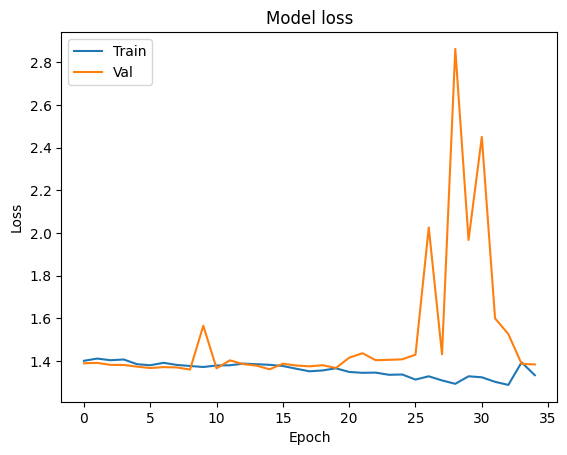

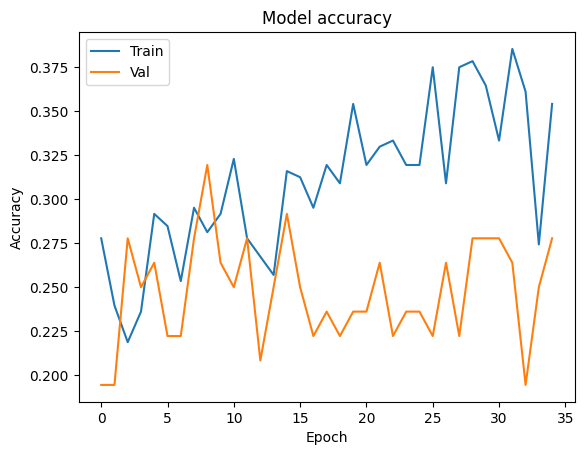

In [8]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [11]:
data_dir = "DATA_ORD_3"
slice_range = (58, 122)

data, labels = process_directory(data_dir, slice_range)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

test_data, test_labels = data, labels
batch_size = 2


test_ds = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(batch_size)

In [12]:
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.1479 - loss: 1.6012
Test Loss: 1.4826470613479614
Test Accuracy: 0.20000000298023224


208/208 ━━━━━━━━━━━━━━━━━━━━ 28s 136ms/step


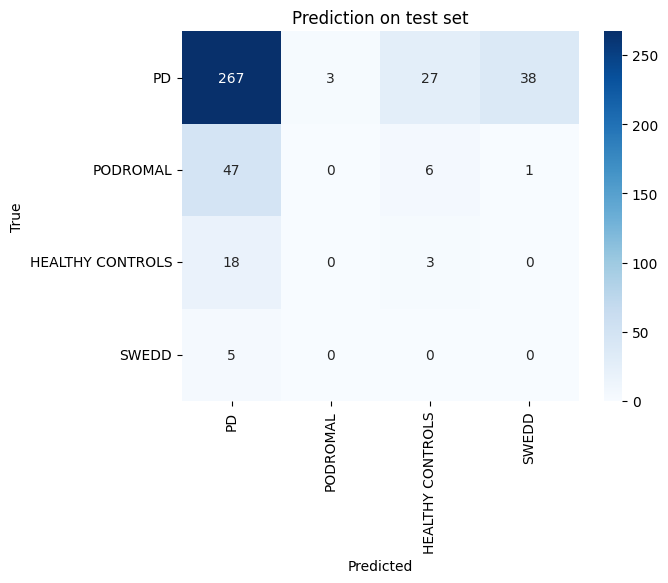


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       335
           1       0.00      0.00      0.00        54
           2       0.08      0.14      0.11        21
           3       0.00      0.00      0.00         5

    accuracy                           0.65       415
   macro avg       0.22      0.23      0.22       415
weighted avg       0.64      0.65      0.65       415



In [62]:
predictions = model.predict(test_ds)
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

test_labels = np.concatenate([y for x, y in test_ds], axis=0)   
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(test_labels, predicted_labels)

class_names = ['PD', 'PODROMAL', 'HEALTHY CONTROLS', 'SWEDD']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Prediction on test set')
plt.show()

print("\nClassification Report:\n", classification_report(test_labels, predicted_labels))